## Analyzing the Data 

In [62]:
# Imports
import sqlite3
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

## Statistical Testing
Conduct hypothesis testing and use linear regression to make recommendations for the new movie studio.

## 4.1 Define Business Goals

- Use statistical analysis to find insights that can be transformed into concrete recommendations for movie production.
- Example goals could be:
  - Identify genres with the highest ROI.
  - Analyze how budget affects box office revenue.

### Measure of Success
We aim to establish a measure of success that the new studio can strive to achieve, which will also help shape our recommendations. Since the studio's goal is to maximize revenue, we will define success as the annual gross revenue of the 5th highest-performing competitor studio.

In [63]:
#Test whether genre has a significant effect on ROI using a t-test
merged_data = pd.read_pickle("../data/merged_data.pkl")
merged_data

,movie_id,primary_title,genres,individual_genre,runtime_minutes,title,studio,domestic_gross,foreign_gross,year,averagerating,numvotes,director_id,director_name,total_gross
0,tt0315642,Wazir,"Action,Crime,Drama",Action,103.0,Wazir,Relbig.,1100000.0,0.0,2016,7.1,15378,nm2349060,Bejoy Nambiar,1100000.0
1,tt0315642,Wazir,"Action,Crime,Drama",Crime,103.0,Wazir,Relbig.,1100000.0,0.0,2016,7.1,15378,nm2349060,Bejoy Nambiar,1100000.0
2,tt0315642,Wazir,"Action,Crime,Drama",Drama,103.0,Wazir,Relbig.,1100000.0,0.0,2016,7.1,15378,nm2349060,Bejoy Nambiar,1100000.0
3,tt0337692,On the Road,"Adventure,Drama,Romance",Adventure,124.0,On the Road,IFC,744000.0,8000000.0,2012,6.1,37886,nm0758574,Walter Salles,8744000.0
4,tt0337692,On the Road,"Adventure,Drama,Romance",Drama,124.0,On the Road,IFC,744000.0,8000000.0,2012,6.1,37886,nm0758574,Walter Salles,8744000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7764,tt8427036,Helicopter Eela,Drama,Drama,135.0,Helicopter Eela,Eros,72000.0,0.0,2018,5.4,673,nm1224879,Pradeep Sarkar,72000.0
7765,tt9078374,Last Letter,"Drama,Romance",Drama,114.0,Last Letter,CL,181000.0,0.0,2018,6.4,322,nm0412517,Shunji Iwai,181000.0
7766,tt9078374,Last Letter,"Drama,Romance",Romance,114.0,Last Letter,CL,181000.0,0.0,2018,6.4,322,nm0412517,Shunji Iwai,181000.0
7767,tt9151704,Burn the Stage: The Movie,"Documentary,Music",Documentary,84.0,Burn the Stage: The Movie,Trafalgar,4200000.0,16100000.0,2018,8.8,2067,nm10201503,Jun-Soo Park,20300000.0


In [64]:
# Use 2018 data as it's the most recent
data_2018 = merged_data[merged_data["year"] == 2018]
data_2018

,movie_id,primary_title,genres,individual_genre,runtime_minutes,title,studio,domestic_gross,foreign_gross,year,averagerating,numvotes,director_id,director_name,total_gross
240,tt0800054,The Guardians,"Comedy,Family",Comedy,88.0,The Guardians,MBox,177000.0,0.0,2018,7.8,68,nm0401827,Chris Hummel,177000.0
241,tt0800054,The Guardians,"Comedy,Family",Family,88.0,The Guardians,MBox,177000.0,0.0,2018,7.8,68,nm0401827,Chris Hummel,177000.0
242,tt6213362,The Guardians,"Drama,War",Drama,138.0,The Guardians,MBox,177000.0,0.0,2018,6.8,1314,nm0064741,Xavier Beauvois,177000.0
243,tt6213362,The Guardians,"Drama,War",War,138.0,The Guardians,MBox,177000.0,0.0,2018,6.8,1314,nm0064741,Xavier Beauvois,177000.0
244,tt6901956,The Guardians,"Action,Adventure,Comedy",Action,46.0,The Guardians,MBox,177000.0,0.0,2018,4.1,7,nm7014443,Sebastian Garcia Lorenzo,177000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7764,tt8427036,Helicopter Eela,Drama,Drama,135.0,Helicopter Eela,Eros,72000.0,0.0,2018,5.4,673,nm1224879,Pradeep Sarkar,72000.0
7765,tt9078374,Last Letter,"Drama,Romance",Drama,114.0,Last Letter,CL,181000.0,0.0,2018,6.4,322,nm0412517,Shunji Iwai,181000.0
7766,tt9078374,Last Letter,"Drama,Romance",Romance,114.0,Last Letter,CL,181000.0,0.0,2018,6.4,322,nm0412517,Shunji Iwai,181000.0
7767,tt9151704,Burn the Stage: The Movie,"Documentary,Music",Documentary,84.0,Burn the Stage: The Movie,Trafalgar,4200000.0,16100000.0,2018,8.8,2067,nm10201503,Jun-Soo Park,20300000.0


In [65]:
# since we have multiple rows for each movie_id (one row for each
# genre and director), we have to groupby movie_id

gross_by_movie_id_2018 = data_2018.groupby("movie_id")[["runtime_minutes", "studio", "total_gross"]].max()
gross_by_movie_id_2018

,runtime_minutes,studio,total_gross
movie_id,,,
tt0800054,88.0,MBox,177000.0
tt0804509,100.0,WB,172500000.0
tt1034415,152.0,Amazon,7900000.0
tt1072748,99.0,LGF,25100000.0
tt1213641,141.0,Uni.,105700000.0
...,...,...,...
tt8404272,101.0,WGUSA,82847000.0
tt8427036,135.0,Eros,72000.0
tt9042690,89.0,CJ,111000.0


In [66]:
gross_by_studio_2018 = gross_by_movie_id_2018.groupby("studio")["total_gross"].sum().sort_values(ascending=False)
gross_by_studio_2018

studio
BV       5.469700e+09
WB       5.073300e+09
Uni.     4.043222e+09
Par.     2.364300e+09
Fox      2.128500e+09
             ...     
OutF     7.350000e+04
Super    5.210000e+04
Icar.    1.780000e+04
Men.     1.220000e+04
Grav.    1.700000e+03
Name: total_gross, Length: 67, dtype: float64

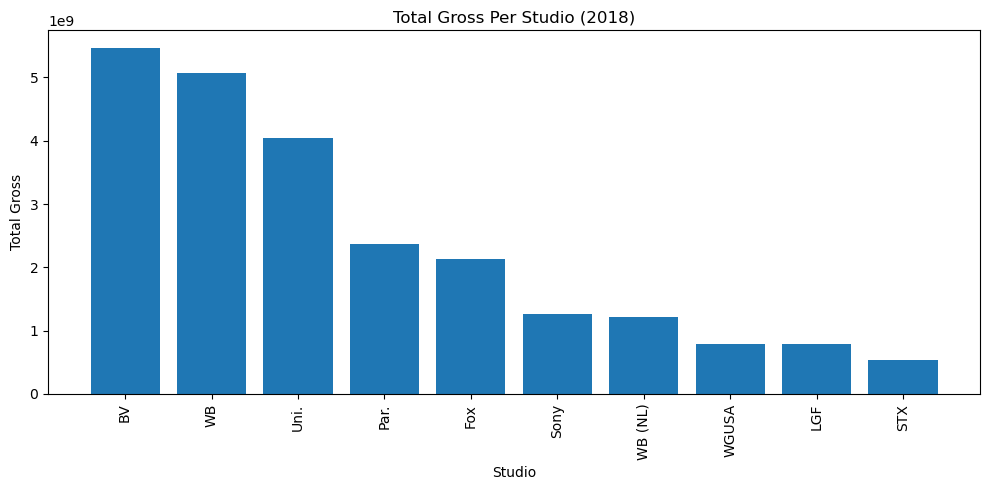

In [67]:
# Plot the top 10 grossing studios

fig, ax = plt.subplots(figsize=(10,5))

top_10_studios_2018 = list(gross_by_studio_2018.keys())[:10]
top_10_gross_2018 = list(gross_by_studio_2018.values)[:10]

ax.bar(top_10_studios_2018, top_10_gross_2018)

ax.set_title("Total Gross Per Studio (2018)")
ax.set_xlabel("Studio")
ax.set_ylabel("Total Gross")
plt.xticks(rotation=90)


plt.tight_layout()
plt.show()

In [68]:
# "Box office success" can be defined as reaching the revenue
# of the middle studio among the top 10 in 2018.

box_office_success_goal = top_10_gross_2018[4]

print(f"The middle-grossing studio among the top 10: {top_10_studios_2018[4]} with a total annual gross profit of ${box_office_success_goal:,}")


The middle-grossing studio among the top 10: Fox with a total annual gross profit of $2,128,500,000.0


The fifth-most-successful studio is Fox with a total annual gross profit of $2,128,500,000. We recommend that the new studio generates a minimum annual revenue of $2,128,500,000.

## 4.2 Conduct Statistical Test

- Use hypothesis testing (e.g., t-tests or ANOVA) to determine if certain variables (e.g., genre, budget) significantly impact movie success.


In [69]:
merged_data["total_gross"].value_counts()

total_gross
253000.0     72
1300000.0    48
1200000.0    45
1800000.0    39
1100000.0    38
             ..
303000.0      1
1695000.0     1
8200.0        1
60500.0       1
72000.0       1
Name: count, Length: 1939, dtype: int64

In [70]:
# check to see if there are any null values in total_gross
merged_data["total_gross"].isnull().sum()

0

In [71]:
# Getting median total gross reveue for each individual genre
gross_by_genre = merged_data.groupby("individual_genre")["total_gross"].median().sort_values(ascending=False)
gross_by_genre

individual_genre
Adventure      150700000.0
Animation      140100000.0
Sci-Fi         137000000.0
Unknown        136399999.0
Action          60475000.0
Family          45900000.0
Fantasy         36135400.0
Horror          14729000.0
Comedy          14300000.0
Sport           13750000.0
Thriller        10800000.0
Mystery         10099999.0
Crime           10000000.0
Biography        5100000.0
History          5088000.0
Music            3700000.0
Romance          3400000.0
Drama            3100000.0
Western          3077000.0
Musical          1616000.0
War              1072000.0
Documentary       411000.0
News              114100.0
Name: total_gross, dtype: float64

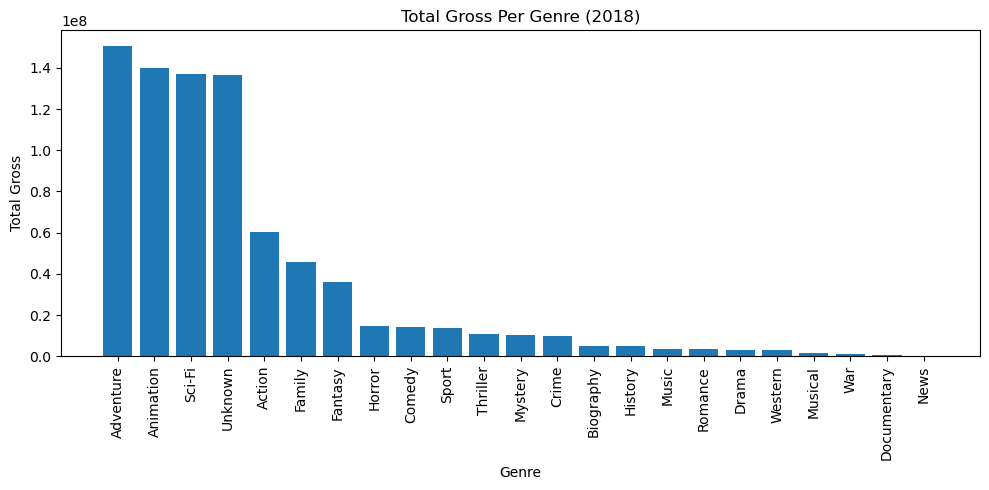

In [72]:
fig, ax = plt.subplots(figsize=(10,5))

ax.bar(list(gross_by_genre.keys()), list(gross_by_genre.values))

ax.set_title("Total Gross Per Genre (2018)")
ax.set_xlabel("Genre")
ax.set_ylabel("Total Gross")
plt.xticks(rotation=90)


plt.tight_layout()
plt.show()

In [73]:
# define our alpha
alpha = 0.01

# get the list of genres in data
genres = list(merged_data["individual_genre"].unique())
genres.remove("Unknown")

# create dictionary of df for each genre
total_gross_data_per_genre = {}
for genre in genres:
    total_gross_data_per_genre[genre] = list(merged_data[merged_data["individual_genre"] == genre]["total_gross"].values)

In [74]:
result = stats.f_oneway(*total_gross_data_per_genre.values())
f_stat, p_value = result

p_value

8.667877370248152e-284

In [75]:
# Look at the OLS ANOVA table
formula = "total_gross ~ C(individual_genre)"
anova_sm = ols(formula=formula, data=merged_data).fit()
anova_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_gross   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     69.72
Date:                Fri, 25 Oct 2024   Prob (F-statistic):          4.16e-283
Time:                        15:11:21   Log-Likelihood:            -1.5874e+05
No. Observations:                7769   AIC:                         3.175e+05
Df Residuals:                    7746   BIC:                         3.177e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                           1.671e+08    6.9e+06     24.221      0.000    1.54e+08    1.81e+08
C(individual_genre)[T.Adventure]    1.204e+08   1.05e+07     11.421      0.000    9.97e+07    1.41e+08
C(individual_genre)[T.Animation]    1.198e+08   1.39e+07      8.644      0.000    9.27e+07    1.47e+08
C(individual_genre)[T.Biography]   -1.233e+08   1.25e+07     -9.895      0.000   -1.48e+08   -9.88e+07
C(individual_genre)[T.Comedy]      -7.054e+07   8.83e+06     -7.988      0.000   -8.78e+07   -5.32e+07
C(individual_genre)[T.Crime]       -1.152e+08   1.14e+07    -10.090      0.000   -1.38e+08   -9.28e+07
C(individual_genre)[T.Documentary] -1.425e+08   1.23e+07    -11.594      0.000   -1.67e+08   -1.18e+08
C(individual_genre)[T.Drama]       -1.286e+08   8.06e+06    -15.958      0.000   -1.44e+08   -1.13e+08
C(individual_genre)[T.Family]      -5.819e+07   1.69e+07     -3.434      0.001   -9.14e+07    -2.5e+07
C(individual_genre)[T.Fantasy]     -1.379e+07   1.49e+07     -0.925      0.355    -4.3e+07    1.54e+07
C(individual_genre)[T.History]     -1.266e+08   1.67e+07     -7.586      0.000   -1.59e+08   -9.39e+07
C(individual_genre)[T.Horror]       -1.08e+08   1.29e+07     -8.345      0.000   -1.33e+08   -8.26e+07
C(individual_genre)[T.Music]        -1.28e+08   1.98e+07     -6.458      0.000   -1.67e+08   -8.92e+07
C(individual_genre)[T.Musical]     -9.915e+07   4.21e+07     -2.354      0.019   -1.82e+08   -1.66e+07
C(individual_genre)[T.Mystery]     -1.102e+08    1.4e+07     -7.900      0.000   -1.38e+08   -8.29e+07
C(individual_genre)[T.News]        -1.456e+08   7.43e+07     -1.960      0.050   -2.91e+08    2.33e+04
C(individual_genre)[T.Romance]     -1.332e+08   1.07e+07    -12.438      0.000   -1.54e+08   -1.12e+08
C(individual_genre)[T.Sci-Fi]       1.245e+08   1.65e+07      7.523      0.000    9.21e+07    1.57e+08
C(individual_genre)[T.Sport]       -7.526e+07   2.44e+07     -3.087      0.002   -1.23e+08   -2.75e+07
C(individual_genre)[T.Thriller]    -9.276e+07   1.08e+07     -8.624      0.000   -1.14e+08   -7.17e+07
C(individual_genre)[T.Unknown]     -3.387e+07   6.88e+07     -0.492      0.623   -1.69e+08    1.01e+08
C(individual_genre)[T.War]         -1.475e+08   2.58e+07     -5.714      0.000   -1.98e+08   -9.69e+07
C(individual_genre)[T.Western]     -1.008e+08   3.92e+07     -2.570      0.010   -1.78e+08   -2.39e+07
==============================================================================
Omnibus:                     4741.576   Durbin-Watson:                   0.667
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49741.214
Skew:                           2.822   Prob(JB):                         0.00
Kurtosis:                      14.037   Cond. No.                         38.1
==========

## 4.3 Answering the Questions

### 1. What genres perform best at the box office?
- To answer this question, we want to identify genres and calculate total box office revenue (both domestic and foreign).


In [76]:
# Group by genre and calculate total box office revenue
box_office_by_genre = merged_data.groupby('genres').agg({
    'domestic_gross': 'sum',
    'foreign_gross': 'sum'
}).reset_index()

# Calculate total gross
box_office_by_genre['total_gross'] = box_office_by_genre['domestic_gross'] + box_office_by_genre['foreign_gross']

#Visualize the total gross by genre
# plt.figure(figsize=(12, 6))
# sns.barplot(x='total_gross', y='genres', data=box_office_by_genre.sort_values('total_gross', ascending=False))
# plt.title('Total Box Office Revenue by Genre')
# plt.xlabel('Total Gross Revenue ($)')
# plt.ylabel('Genres')
# plt.show()

### 2. What factors influence a movie’s success (budget, genre, director, etc.)?
- We are going to use a simple linear regression to examine how budget and genre affect box office revenue.
- Convert categorical variables (e.g., genre) to numerical using one-hot encoding.

In [77]:
# Check data types 
print(merged_data.dtypes)


movie_id             object
primary_title        object
genres               object
individual_genre     object
runtime_minutes     float64
title                object
studio               object
domestic_gross      float64
foreign_gross       float64
year                  int64
averagerating       float64
numvotes              int64
director_id          object
director_name        object
total_gross         float64
dtype: object


In [78]:
# Convert columns to appropriate data types
merged_data['domestic_gross'] = pd.to_numeric(merged_data['domestic_gross'], errors='coerce')
merged_data['foreign_gross'] = pd.to_numeric(merged_data['foreign_gross'], errors='coerce')

In [79]:
# Check for missing values and drop rows with missing values
merged_data.dropna(subset=['domestic_gross', 'foreign_gross'], inplace=True)  

In [80]:
#Since were including categorical variables, we need to use one-hot encoding specifically for genre
merged_data = pd.get_dummies(merged_data, columns=['genres'], drop_first=True)

In [81]:
# Define the dependent variable  (total_gross) and independent variables
X = merged_data[['domestic_gross', 'foreign_gross'] + [col for col in merged_data.columns if 'genre_' in col]]  # Include all genre columns
y = merged_data['total_gross'] 

In [82]:
# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            total_gross   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.685e+34
Date:                Fri, 25 Oct 2024   Prob (F-statistic):               0.00
Time:                        15:11:21   Log-Likelihood:             1.1763e+05
No. Observations:                7769   AIC:                        -2.353e+05
Df Residuals:                    7766   BIC:                        -2.352e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.352e-08   8.11e-10     28.

### 3. Which movies have the highest ROI (return on investment)?
- Calculate the ROI for each movie and determine which movies have the highest ROI.
- Visualize the distribution of ROI by genre.

In [83]:
# Sort movies by total gross revenue
high_gross_movies = merged_data.sort_values('total_gross', ascending=False)

# Display the top movies with the highest total gross revenue
print(high_gross_movies[['title', 'total_gross']].head(10))

# Visualize total gross by genre
# plt.figure(figsize=(12, 6))
# sns.boxplot(x='genres', y='total_gross', data=merged_data)
# plt.title('Total Gross Revenue Distribution by Genre')
# plt.xlabel('Genre')
# plt.ylabel('Total Gross Revenue')
# plt.xticks(rotation=45)
# plt.show()


                               title   total_gross
5018         Avengers: Age of Ultron  1.405400e+09
5017         Avengers: Age of Ultron  1.405400e+09
5016         Avengers: Age of Ultron  1.405400e+09
3524                   Black Panther  1.347000e+09
3525                   Black Panther  1.347000e+09
3523                   Black Panther  1.347000e+09
5217        Star Wars: The Last Jedi  1.332600e+09
5216        Star Wars: The Last Jedi  1.332600e+09
5215        Star Wars: The Last Jedi  1.332600e+09
6989  Jurassic World: Fallen Kingdom  1.309500e+09


## 4.4 Create Visuals Using Tableau
- Since Tableau does not support .pkl files directly, we have to load the data in Python and then save it as a CSV.

In [84]:
# Load the merged data
merged_data = pd.read_pickle('../data/merged_data.pkl')

# Save to CSV
merged_data.to_csv('../data/merged_data.csv', index=False)

### 1. What genres perform best at the box office? 
- A bar chart that shows the domestic and foreign gross revenues of different genres.

![Sheet 1.png](<attachment:Sheet 1.png>)
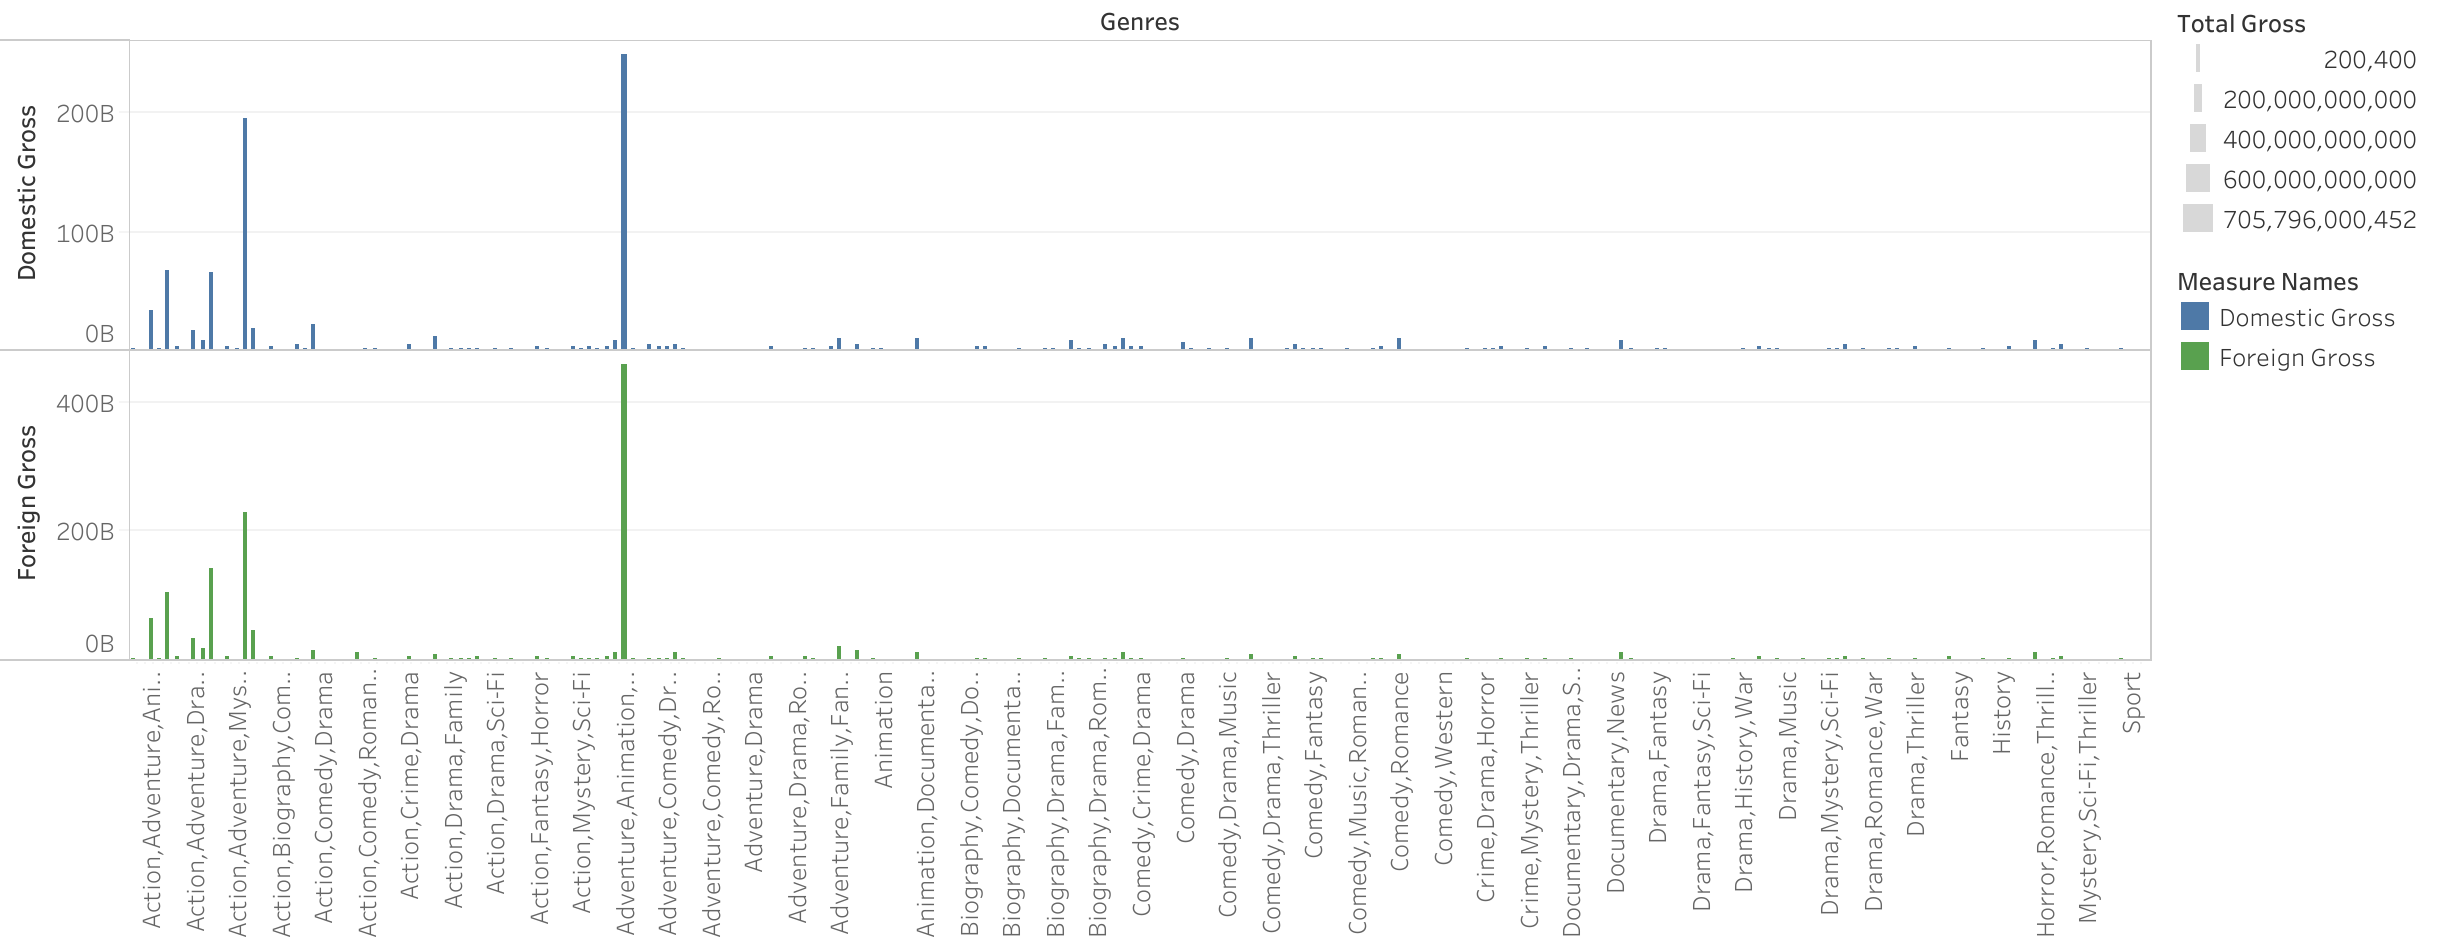

![Sheet 4.png](<attachment:Sheet 4.png>)
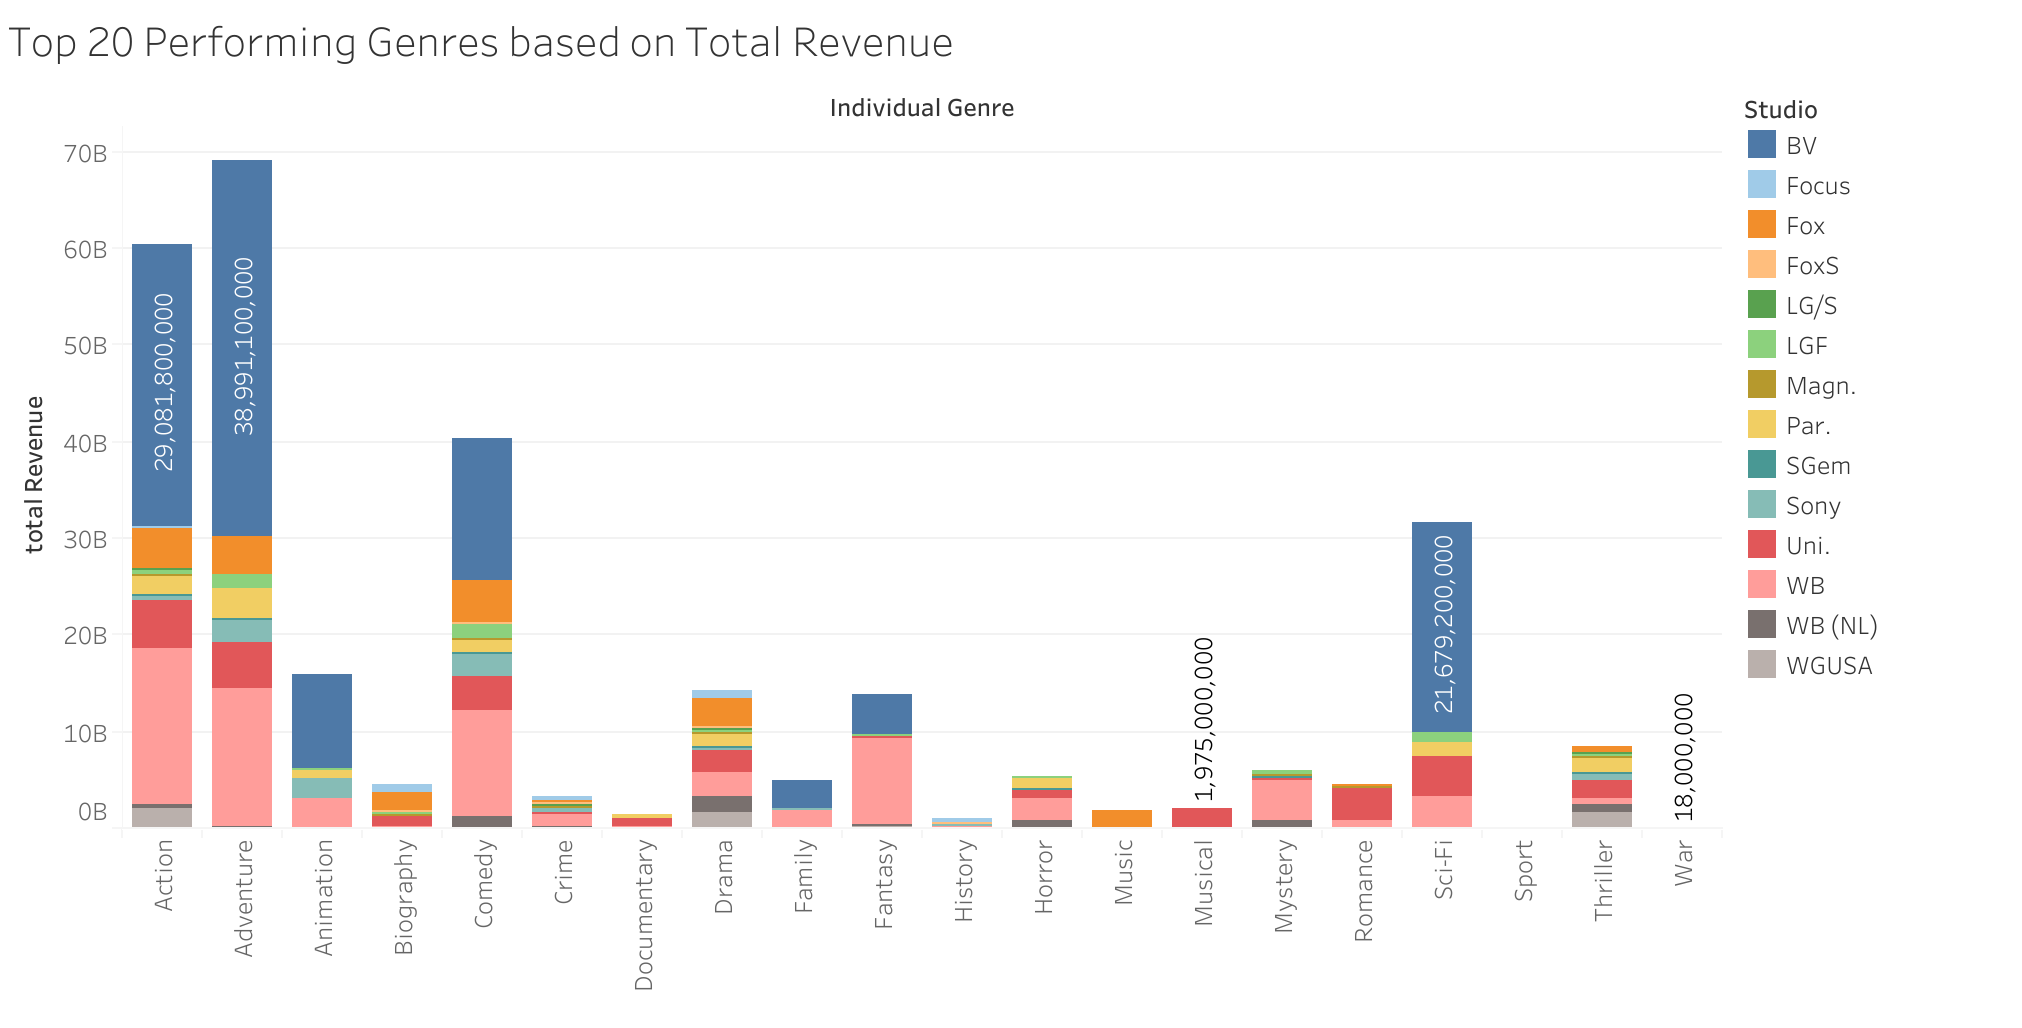

Action-Adventure Combinations Dominate 

- Genres combining action and adventure with other elements like fantasy, comedy, or sci-fi perform consistently well. Studios should focus on producing films that combine these genres to tap into audience preferences for high-energy, visually exciting films.

Family-Friendly Content is Profitable 

- Genres that include family elements (e.g., adventure, animation, family) rank among the top performers. This suggests that films with broad appeal to families, especially in animation, are strong box office contenders.

Diversity in Genre Combinations 

- Genres that blend multiple appealing factors (e.g., animation, comedy, adventure) tend to perform better than single-genre films. Studios should consider cross-genre films that mix action, family appeal, or animation to increase their chances of success.

### 2. What Factors Influence a Movie’s Success?
- A scatter plot visualizing relationships between factors like domestic and foreign gross and their respective genres or studios.
- Filtered to show only the top 20 genres and top 20 studios.


![Sheet 2.png](<attachment:Sheet 2.png>)
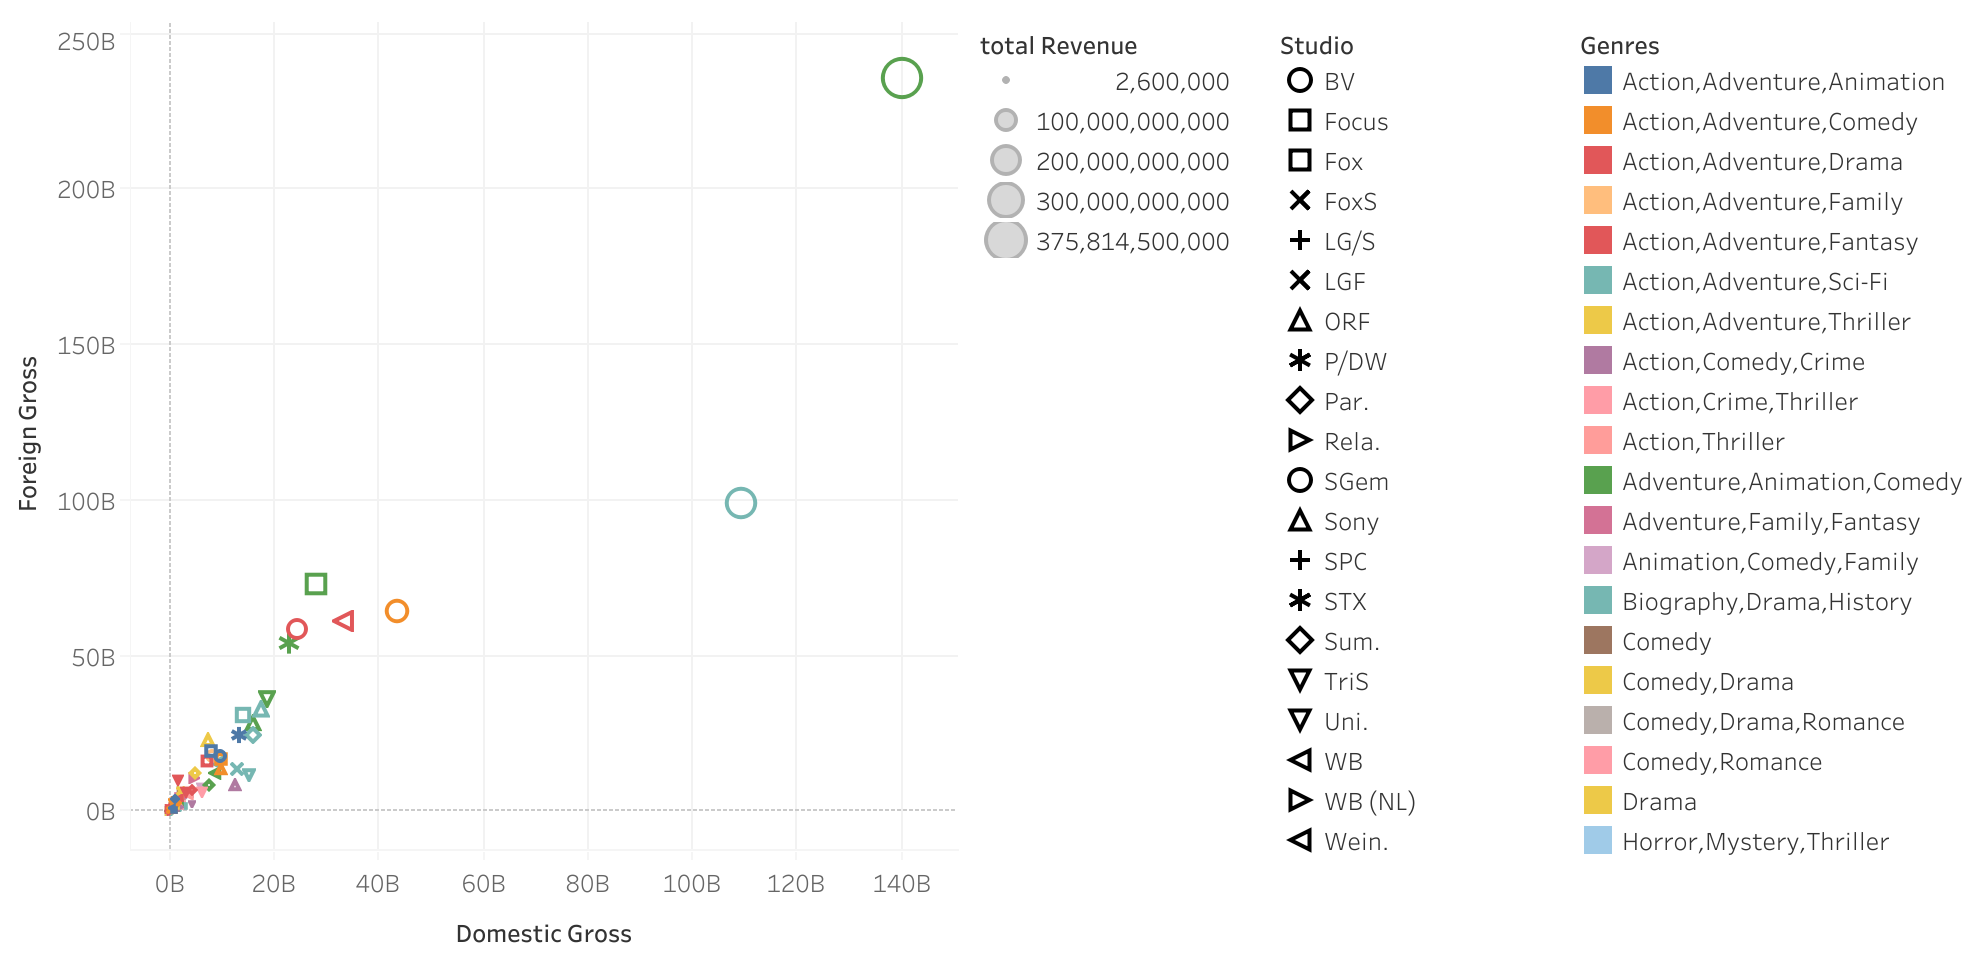

![Sheet 5.png](<attachment:Sheet 5.png>)
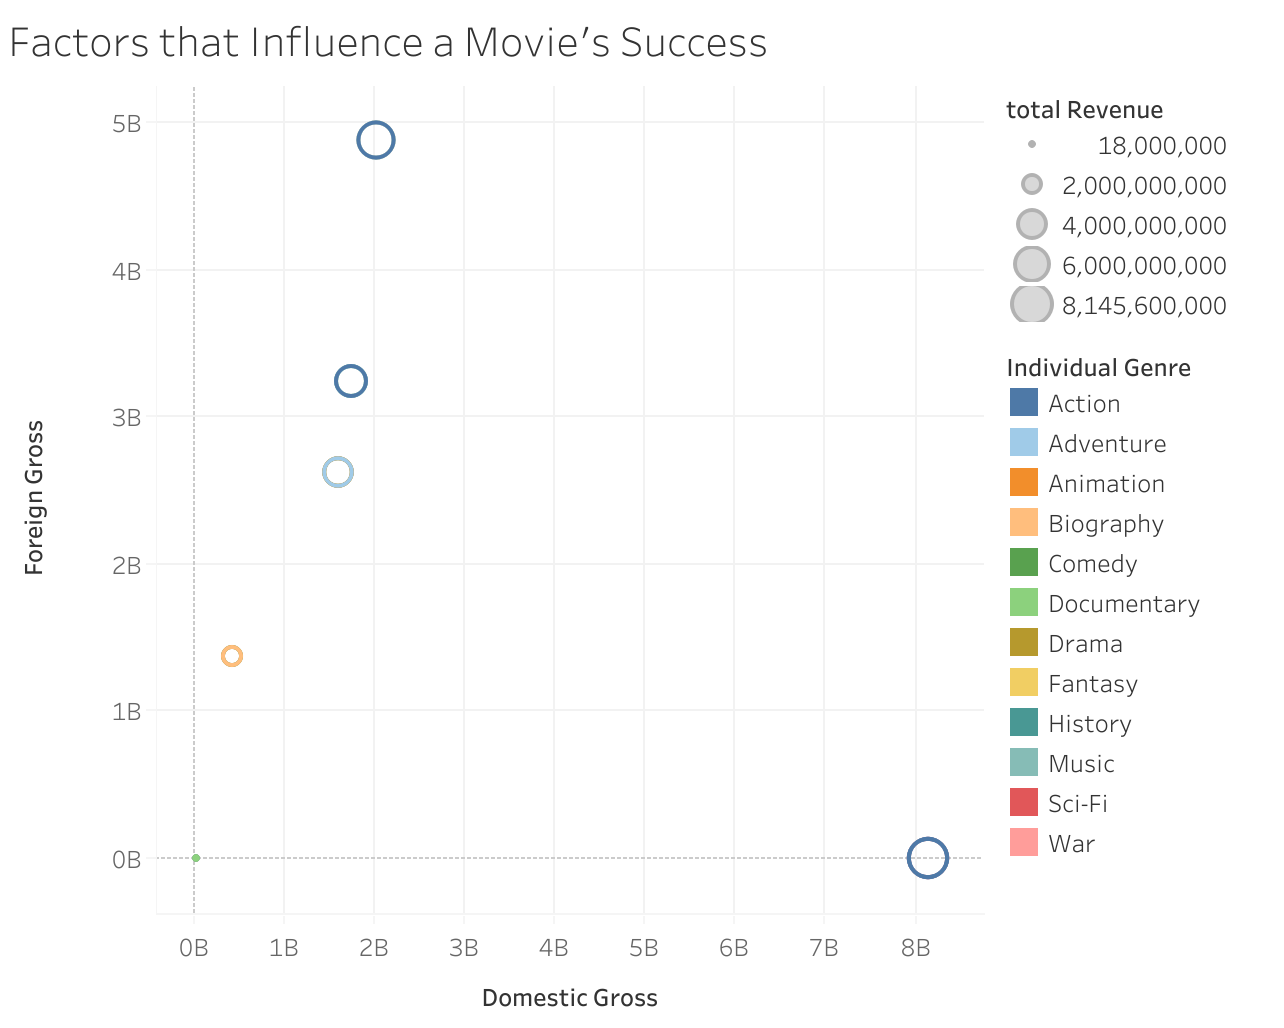

Top Studios Drive Success 

- The top-performing studios (e.g., Warner Bros, Universal, Disney) consistently produce hits, suggesting that partnering with these established players or emulating their production and marketing strategies could increase a studio’s likelihood of success.

Genre Preferences are Key 

- The same top genres that performed well in Question 1 dominate success factors for movies, reaffirming that focusing on action-adventure, family, and animation films can boost revenue. Studios should align their production efforts with these trends.

Brand Loyalty and Proven Directors 

- Established studios tend to invest in proven directors and franchises, which may contribute to their consistent success. New studios should look for talent with a history of success or align with experienced directors to enhance their market position.

### 3. Which Movies Have the Highest ROI
- A bar chart showing the Total Revenue (domestic + foreign gross) for the top 20 movies.
- ROI will be represented visually, even though there's no budget column.
- Filtered to display only the top 20 movie titles and their associated genres.

![Sheet 3.png](<attachment:Sheet 3.png>)
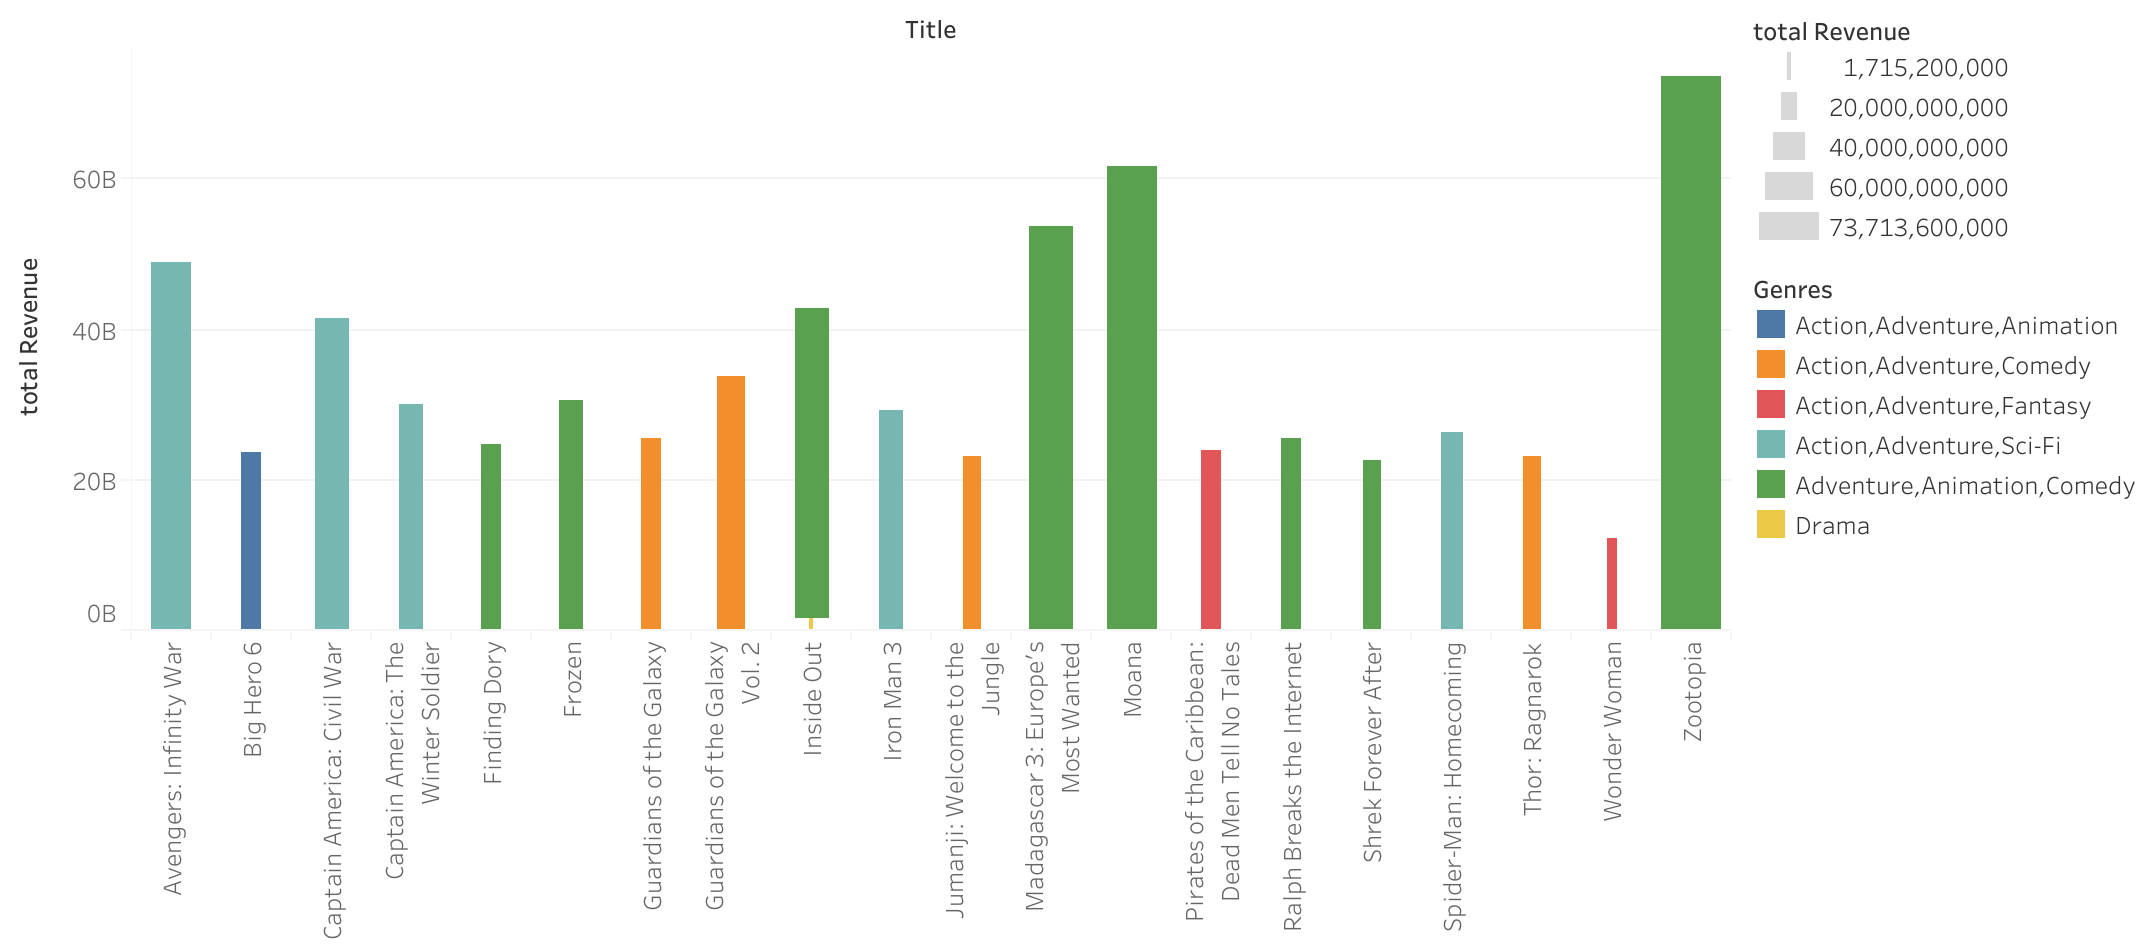

![Sheet 5.png](<attachment:Sheet 5.png>)
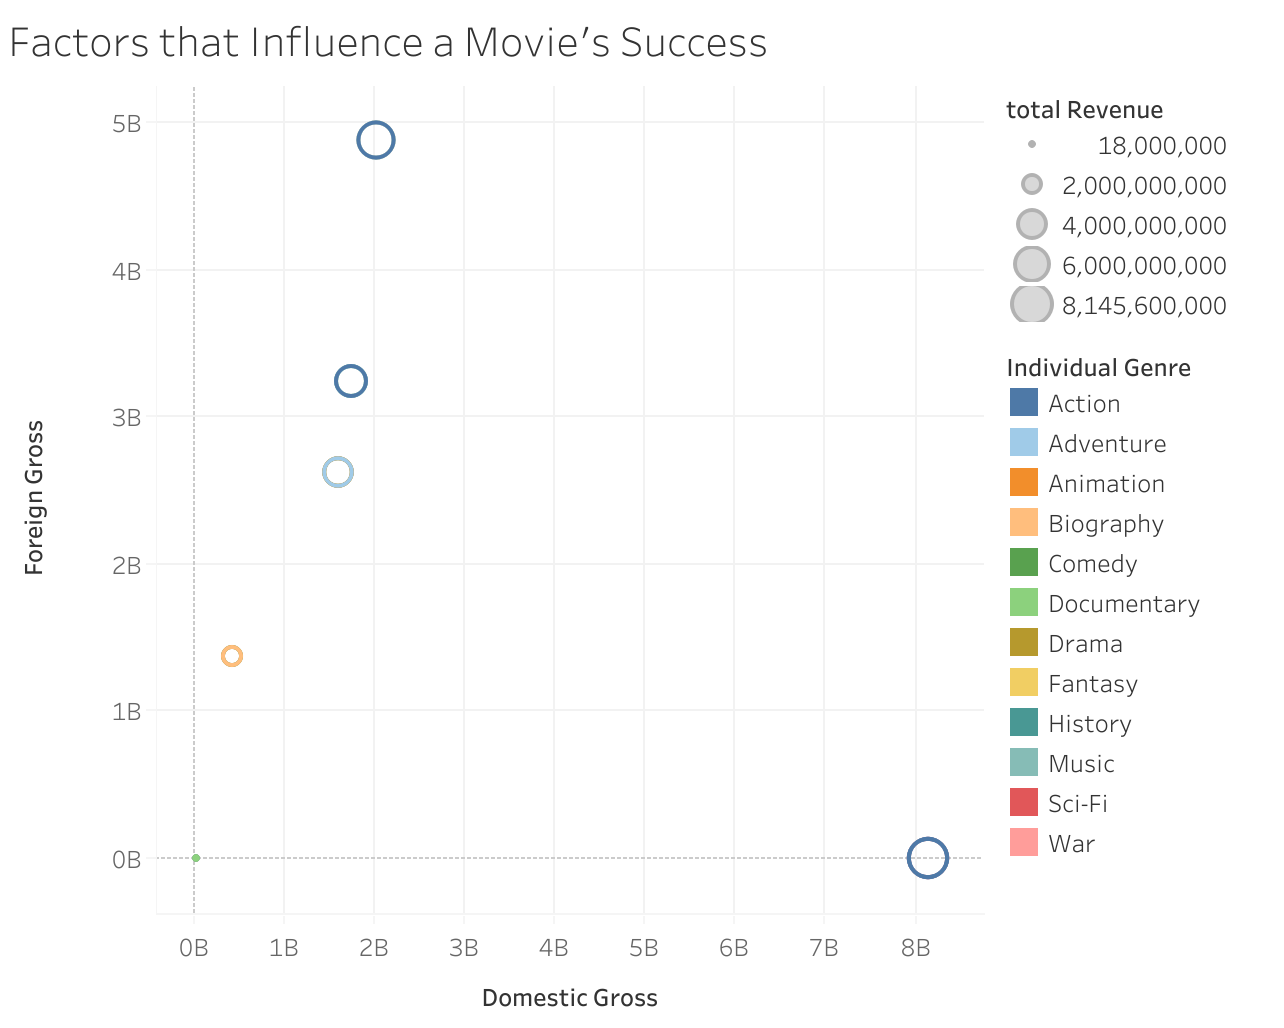

Franchise Power 

- Many of the top 20 highest-grossing films, like Avengers: Infinity War, Guardians of the Galaxy, and Frozen, are part of successful franchises. New studios should prioritize developing film series or franchises to build long-term financial success.

Animation and Family Films Generate High Returns

- Movies like Zootopia, Inside Out, and Frozen highlight the profitability of animated family films. Animation is a high ROI genre, especially when combined with family-friendly content, making it an attractive investment for new studios.

Superheroes are Big Business 

- Films featuring superhero characters, like Iron Man 3 and Wonder Woman, appear frequently among top ROI movies. Superhero films remain a reliable and lucrative genre that should continue to be a focus for high-revenue generation.